In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 

c:\Users\nabil\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('train.csv')

In [ ]:
data.isnull().sum()
data.drop('Cabin', axis=1, inplace=True)
data.dropna(inplace=True)

In [4]:
data.head()

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [5]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

In [11]:
# Train a decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(x_train, y_train)


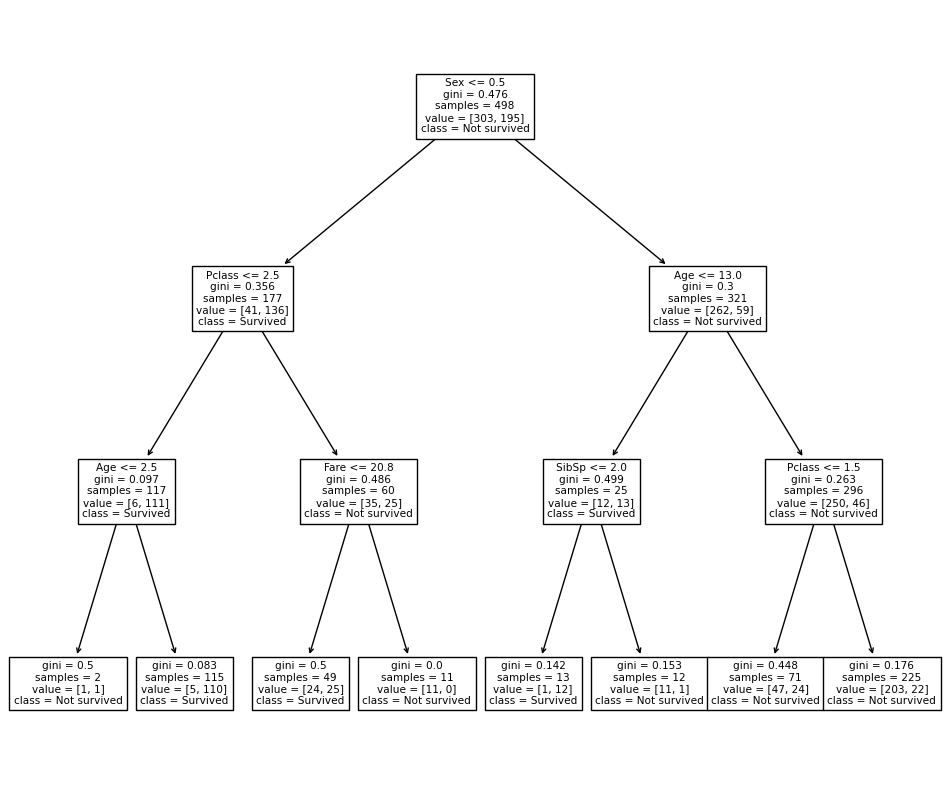

In [12]:
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(dt_model, feature_names=list(X.columns), class_names=['Not survived', 'Survived'])
plt.show()


In [13]:
print("Accuracy score on Testing set: ", dt_model.score(x_test, y_test))

Accuracy score on Testing set:  0.7990654205607477


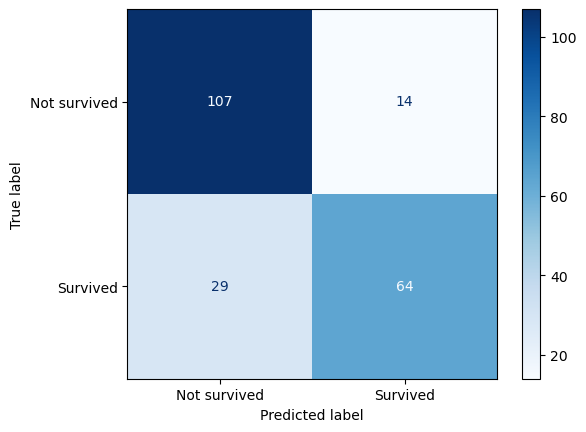

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_model.predict(x_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

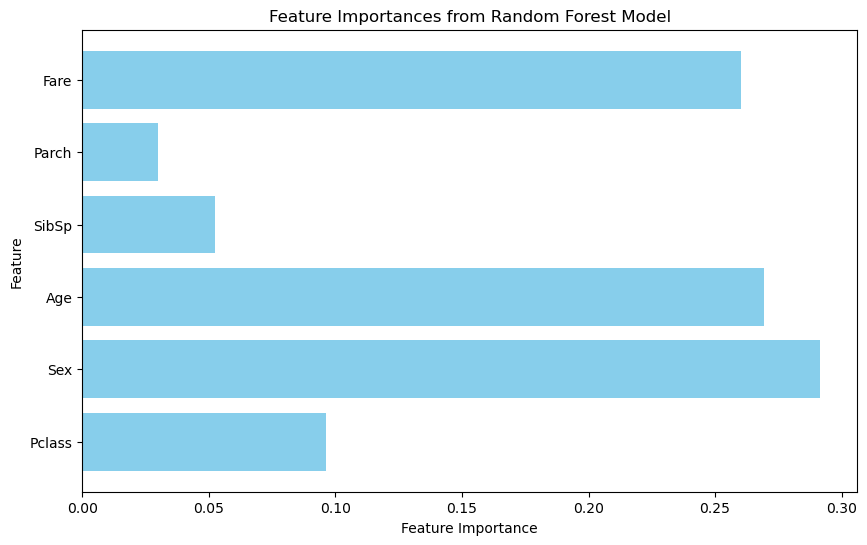

In [18]:
# Plot feature importances from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = rf.fit(x_train, y_train)

# Evaluate the model
print("Accuracy score on Testing set: ", rf_model.score(x_test, y_test))

Accuracy score on Testing set:  0.780373831775701


In [16]:
from sklearn.ensemble import AdaBoostClassifier

# Train an AdaBoost model
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model = ab.fit(x_train, y_train)

# Evaluate the model
print("Accuracy score on Testing set: ", ab_model.score(x_test, y_test))

c:\Users\nabil\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score on Testing set:  0.7523364485981309


In [17]:
# Calculate accuracy scores for all three models
dt_accuracy = dt_model.score(x_test, y_test)
rf_accuracy = rf_model.score(x_test, y_test)
ab_accuracy = ab_model.score(x_test, y_test)

# Display the results
print("Model Performance Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"AdaBoost Accuracy: {ab_accuracy:.2f}")

Model Performance Comparison:
Decision Tree Accuracy: 0.80
Random Forest Accuracy: 0.78
AdaBoost Accuracy: 0.75
